In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
emotion_df = pd.read_csv('content/emotions.csv')

In [3]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
violence_df = pd.read_csv('content/violence.csv')

In [5]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [6]:
hate_df = pd.read_csv('content/hatespeech.csv')

In [7]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## Data Prepocessing

In [8]:
#dropping unwanted columns
emotion_df.drop(columns=['Unnamed: 0'], inplace=True)
violence_df.drop(columns=['Tweet_ID'], inplace=True)
hate_df = hate_df[['tweet', 'class']]

In [9]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [10]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [11]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [12]:
emotion_df.columns, violence_df.columns,  hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [13]:
#renaming the columns
violence_df.rename(columns={'tweet': 'text', 'type': 'label'}, inplace=True)
hate_df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)

In [14]:
hate_df.index

RangeIndex(start=0, stop=24783, step=1)

In [15]:
emotion_df.columns, violence_df.columns,  hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [16]:
#checking for null values
emotion_df.isna().sum(), violence_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [17]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

Taking(Extracting) 12000 rows from each dataset

In [18]:
emotion_df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [19]:
e_df = pd.DataFrame()
for i in range(6):
    subset = emotion_df[emotion_df['label'] == i].sample(n=2000, random_state=42)
    e_df = pd.concat([e_df,subset])

e_df

,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0
131379,i feel like i have lost mourned and moved past...,0
148369,i could write a whole lot more about why im fe...,0
134438,i always seem to feel inadequate,0
...,...,...
32372,i admire makes me feel amazed at my life,5
102832,i would likely not repurchase as i do not feel...,5
352035,i can t help it i feel weird asking somebody t...,5
11976,i still feel and am shocked that im getting cl...,5


In [20]:
e_df.shape

(12000, 2)

In [21]:
emotion_df = e_df.copy()

In [22]:
emotion_df['label'].value_counts()

label
0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

In [23]:
violence_df['label'].value_counts()

label
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

In [24]:
violence_df['label']

0          sexual_violence
1          sexual_violence
2          sexual_violence
3          sexual_violence
4          sexual_violence
               ...        
39645      sexual_violence
39646      sexual_violence
39647    Physical_violence
39648      sexual_violence
39649      sexual_violence
Name: label, Length: 39650, dtype: object

In [25]:
#we just want 4998 rows from the sexual_violence label
sexual_violence = violence_df[violence_df['label'] == 'sexual_violence'].sample(n=4998, random_state=42)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']

In [26]:
violence_df.shape

(7002, 2)

In [27]:
violence_df = pd.concat([sexual_violence, violence_df], axis=0)

In [28]:
violence_df

,text,label
35209,My cousin was raped by this guy Matthew. She w...,sexual_violence
38191,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence
20925,I remember how I almost got raped like it was ...,sexual_violence
16674,He raped me 👈,sexual_violence
29906,"A woman raped by A male: psychological horror,...",sexual_violence
...,...,...
39611,"Court grants woman’s divorce request, after hu...",Physical_violence
39623,** My husband beats my mother – Wife tells cou...,Physical_violence
39634,I was told that me saying Jake was a league av...,Physical_violence
39639,I’m Leaving My Husband Because He Beats And Ra...,Physical_violence


In [29]:
violence_df.shape

(12000, 2)

In [30]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [31]:
#we just want 6407 rows from the offensive speech label (1)
offensive_speech = hate_df[hate_df['label'] == 1].sample(n=6407, random_state=42)
hate_df = hate_df[hate_df['label'] != 1]
hate_df = pd.concat([offensive_speech, hate_df], axis=0)

In [32]:
hate_df.shape

(12000, 2)

In [33]:
emotion_df.shape, violence_df.shape, hate_df.shape

((12000, 2), (12000, 2), (12000, 2))

Resetting the indexes

In [34]:
emotion_df.reset_index(drop=True, inplace=True)
violence_df.reset_index(drop=True, inplace=True)
hate_df.reset_index(drop=True, inplace=True)

In [35]:
emotion_df.head(3)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0


## Label Encoding

In [36]:
label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [37]:
violence_df.head()

,text,label
0,My cousin was raped by this guy Matthew. She w...,4
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,4
2,I remember how I almost got raped like it was ...,4
3,He raped me 👈,4
4,"A woman raped by A male: psychological horror,...",4


In [38]:
violence_df['label'].unique()

array([4, 1, 3, 0, 2])

In [39]:
hate_df['label'].unique()

array([1, 2, 0], dtype=int64)

In [40]:
emotion_df['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

## Stopwords Removal

In [41]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Mariam
[nltk_data]     Aghamalyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Mariam
[nltk_data]     Aghamalyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
#loading the stopwords
stop_words = set(stopwords.words('english'))

In [43]:
len(stop_words)

179

In [44]:
#stopwords removal function

def remove_stopwords(text):
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [45]:
emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hate_df['text'] = hate_df['text'].apply(remove_stopwords)

## Tokenization & Padding

In [46]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hate_df['text']]))

In [47]:
emotion_sequences = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [48]:
# lengths_e = [len(seq) for seq in emotion_sequences]
# print(f"Min length: {min(lengths_e)}, Max length: {max(lengths_e)}, Average length: {sum(lengths_e)/len(lengths_e)}")
# lengths_v = [len(seq) for seq in violence_sequences]
# print(f"Min length: {min(lengths_v)}, Max length: {max(lengths_v)}, Average length: {sum(lengths_v)/len(lengths_v)}")
# lengths_h = [len(seq) for seq in hate_sequences]
# print(f"Min length: {min(lengths_h)}, Max length: {max(lengths_h)}, Average length: {sum(lengths_h)/len(lengths_h)}")

In [49]:
max_length = 50
emotion_padded = pad_sequences(emotion_sequences, maxlen=max_length, padding='post')
violence_padded = pad_sequences(violence_sequences, maxlen=max_length, padding='post')
hate_padded = pad_sequences(hate_sequences, maxlen=max_length, padding='post')

In [50]:
#generating labels in numpy array format
emotion_labels = np.array(emotion_df['label'])
violence_labels = np.array(violence_df['label'])
hate_labels = np.array(hate_df['label'])

## Model Definition

In [51]:
#prepare seperate inputs for each dataset
emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [52]:
#defining multiple input layer for each task
emotion_input_layer = keras.layers.Input(shape=(max_length,), name='emotion_input')
violence_input_layer = keras.layers.Input(shape=(max_length,), name='violence_input')
hate_input_layer = keras.layers.Input(shape=(max_length,), name='hate_input')

In [53]:
#use as shared embedding layer
embedding_layer = keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128)

In [54]:
#applying the embedding layer to each input
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [55]:
#shared LSTM layer
shared_lstm = keras.layers.LSTM(64, return_sequences=True)

In [56]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [57]:
#shared global average pooling layer and dropout layer
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [58]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [59]:
#deciding on how many neurons each output should have
len(emotion_df['label'].unique()), len(violence_df['label'].unique()), len(hate_df['label'].unique())

(6, 5, 3)

In [60]:
#output layers
emotion_output = keras.layers.Dense(6, activation='softmax', name='emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5, activation='softmax', name='violence_output')(violence_features)
hate_output = keras.layers.Dense(3, activation='softmax', name='hate_output')(hate_features)

In [61]:
#compile the model with multiple inputs and outputs
model = keras.models.Model(inputs = [emotion_input_layer, violence_input_layer, hate_input_layer],
                          outputs= [emotion_output, violence_output, hate_output])
model.compile(optimizer='adam',
             loss={
                 'emotion_output': 'sparse_categorical_crossentropy',
                 'violence_output': 'sparse_categorical_crossentropy',
                 'hate_output': 'sparse_categorical_crossentropy'
             },
             metrics={
                 'emotion_output': 'accuracy',
                 'violence_output': 'accuracy',
                 'hate_output': 'accuracy'
             })

In [62]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ emotion_input (InputLayer)    │ (None, 50)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ violence_input (InputLayer)   │ (None, 50)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ hate_input (InputLayer)       │ (None, 50)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 50, 128)           │       5,350,528 │ emotion_input[0][0],       │
│                               │                           │                 │ violence_input[0][0],      │
│                               │                           │                 │ hate_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 50, 64)            │          49,408 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0],           │
│                               │                           │                 │ embedding[2][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 64)                │               0 │ lstm[0][0], lstm[1][0],    │
│ (GlobalAveragePooling1D)      │                           │                 │ lstm[2][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 64)                │               0 │ global_average_pooling1d[… │
│                               │                           │                 │ global_average_pooling1d[… │
│                               │                           │                 │ global_average_pooling1d[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ emotion_output (Dense)        │ (None, 6)                 │             390 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ violence_output (Dense)       │ (None, 5)                 │             325 │ dropout[1][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ hate_output (Dense)           │ (None, 3)                 │             195 │ dropout[2][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 5,400,846 (20.60 MB)

 Trainable params: 5,400,846 (20.60 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [63]:
model.fit(x={'emotion_input': emotion_input,
            'violence_input': violence_input,
            'hate_input': hate_input},
         y={'emotion_output': emotion_labels,
           'violence_output': violence_labels,
           'hate_output': hate_labels},
         epochs=10,
         batch_size=4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 256s 84ms/step - emotion_output_accuracy: 0.2398 - emotion_output_loss: 1.7064 - hate_output_accuracy: 0.6924 - hate_output_loss: 0.7321 - loss: 2.8585 - violence_output_accuracy: 0.8589 - violence_output_loss: 0.4200
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 243s 81ms/step - emotion_output_accuracy: 0.6945 - emotion_output_loss: 0.7532 - hate_output_accuracy: 0.8845 - hate_output_loss: 0.3456 - loss: 1.1585 - violence_output_accuracy: 0.9787 - violence_output_loss: 0.0597
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 241s 80ms/step - emotion_output_accuracy: 0.9376 - emotion_output_loss: 0.2132 - hate_output_accuracy: 0.9262 - hate_output_loss: 0.2085 - loss: 0.4345 - violence_output_accuracy: 0.9967 - violence_output_loss: 0.0129
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 240s 80ms/step - emotion_output_accuracy: 0.9603 - emotion_output_loss: 0.1308 - hate_output_accuracy: 0.9663 - hate_output_loss: 0.1010 - loss: 0.2358 - violence_output_accuracy

## Prediction and Evaluation

In [64]:
prediction = model.predict({'emotion_input': emotion_input,
                           'violence_input': violence_input,
                           'hate_input': hate_input})

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [65]:
prediction

[array([[9.99989867e-01, 7.20521200e-07, 1.19463698e-06, 5.57417707e-06,
         1.91678328e-06, 7.10580764e-07],
        [9.99998093e-01, 1.86264799e-07, 3.24091900e-07, 1.09209657e-06,
         1.81655409e-07, 8.24247337e-08],
        [9.99991298e-01, 1.06196319e-06, 8.33404556e-07, 5.34696255e-06,
         1.19912102e-06, 3.13982838e-07],
        ...,
        [2.53412436e-04, 9.56461008e-05, 3.02833814e-05, 1.16971125e-04,
         6.35427758e-02, 9.35960948e-01],
        [6.76713967e-07, 5.48984190e-07, 1.62245010e-06, 7.39470352e-08,
         3.76888820e-05, 9.99959350e-01],
        [7.81819836e-06, 2.84449311e-06, 6.71652515e-06, 1.17786931e-06,
         1.19029086e-04, 9.99862313e-01]], dtype=float32),
 array([[3.78381815e-09, 5.53585067e-10, 2.11272666e-09, 1.38208458e-08,
         1.00000000e+00],
        [6.99658358e-08, 1.11681906e-07, 4.05323810e-08, 5.63753986e-07,
         9.99999166e-01],
        [4.35098757e-09, 2.79445772e-10, 1.40099188e-09, 1.05124942e-09,
         

In [66]:
emotion_pred = np.argmax(prediction[0], axis=1)
violence_pred = np.argmax(prediction[1], axis=1)
hate_pred = np.argmax(prediction[2], axis=1)

In [67]:
def plot_cm(true, pred, title, labels):
    cf = confusion_matrix(true, pred, normalize='true')
    plt.figure(figsize=(7,6))
    sns.heatmap(cf, annot=True,cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Hamful_traditional_practice', 'economic_violence']
hate_labels_text = ['offensive speech', 'Neither', 'Hate speech']

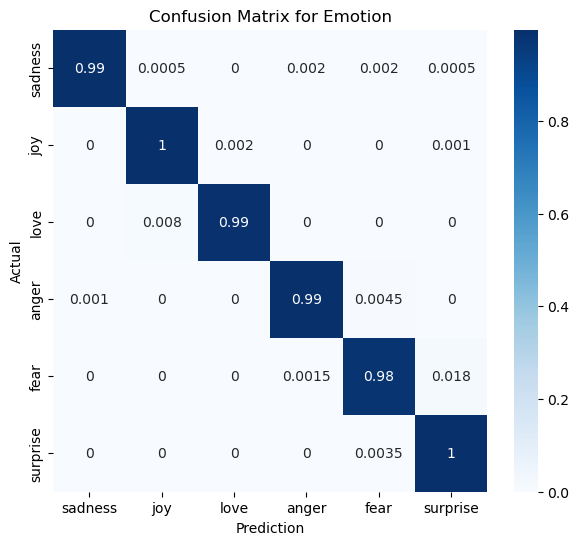

In [68]:
plot_cm(emotion_labels, emotion_pred, 'Confusion Matrix for Emotion', emotion_labels_text)

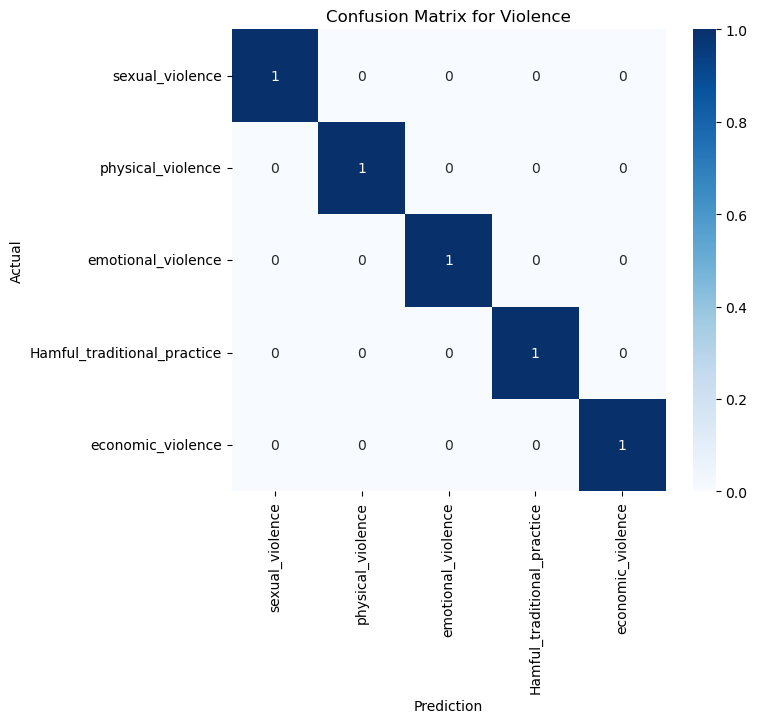

In [69]:
plot_cm(violence_labels, violence_pred, 'Confusion Matrix for Violence', violence_labels_text)

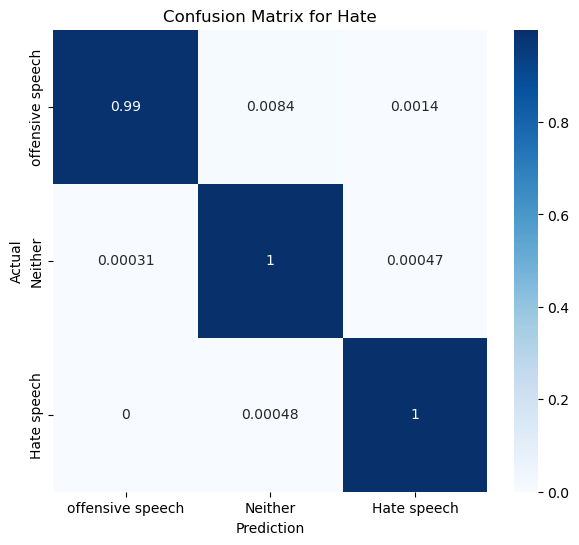

In [70]:
plot_cm(hate_labels, hate_pred, 'Confusion Matrix for Hate', hate_labels_text)

## Manual Testing

In [71]:
def classify_text(input_text):
    #preprocessing the input text
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequences, maxlen=max_length, padding='post')
    
    #prediction
    predictions = model.predict({'emotion_input': input_padded,
                           'violence_input': input_padded,
                           'hate_input': input_padded})
    emotion_pred = np.argmax(predictions[0], axis=1)[0]
    violence_pred = np.argmax(predictions[1], axis=1)[0]
    hate_pred = np.argmax(predictions[2], axis=1)[0]

    #determining major label
    major_labels =['Emotion', 'Violence', 'Hate']
    major_label_index = np.argmax([np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])])
    major_label = major_labels[major_label_index]

    #determining sub-labels
    emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Hamful_traditional_practice', 'economic_violence']
    hate_labels_text = ['offensive speech', 'Neither', 'Hate speech']

    if major_label == 'Emotion':
        sub_label =  emotion_labels_text[emotion_pred]
    elif  major_label == 'Violence':
        sub_label = violence_labels_text[violence_pred]
    else:
        sub_label = hate_labels_text[hate_pred]

    return major_label, sub_label

In [98]:
import ipywidgets as widgets
from IPython.display import display

In [92]:
#defining a text widget and a placeholder
input_text_widget = widgets.Text(
    description = 'Input text : ',
    placeholder = 'Enter your text'
)

In [93]:
#defining classify button
button = widgets.Button(description = 'classify')

In [94]:
#defining an output area to display result
output = widgets.Output()

In [95]:
#function to hande event
def on_button_click(b):
    with output:
        output.clear_output() #clear the previous output
        input_text = input_text_widget.value
        major_label, sub_level = classify_text(input_text)
        print(f"Major Label: {major_label}")
        print(f"Sub Label: {sub_label}")

#attaching the button at bottom
button.on_click(on_button_click)

In [96]:
display(input_text_widget, button, output)

Text(value='', description='Input text : ', placeholder='Enter your text')

Button(description='classify', style=ButtonStyle())

Output()